In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

In [2]:
df = pd.read_csv('motor_colision.csv')

In [3]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3
0,03/29/2018,17:40,QUEENS,11435.0,JAMAICA AVENUE,144 STREET,1.0,0.0,1,0,...,0,0,0,Failure to Yield Right-of-Way,No Car Involved,No Car Involved,3872020,Station Wagon/Sport Utility Vehicle,No Car Type,No Car Type
1,03/14/2016,14:45,MANHATTAN,10003.0,3 AVENUE,EAST 13 STREET,1.0,0.0,1,0,...,0,0,0,Unspecified,No Car Involved,No Car Involved,3406298,Bus,No Car Type,No Car Type
2,09/06/2016,22:08,QUEENS,11377.0,ROOSEVELT AVENUE,70 STREET,0.0,0.0,0,0,...,0,0,0,Backing Unsafely,Unspecified,No Car Involved,3514963,Sedan,Sedan,No Car Type
3,05/23/2018,16:16,QUEENS,11417.0,104 STREET,LIBERTY AVENUE,0.0,0.0,0,0,...,0,0,0,Unspecified,Unspecified,No Car Involved,3906228,Sedan,Pick-up Truck,No Car Type
4,02/13/2017,4:00,BRONX,10455.0,3 AVENUE,EAST 149 STREET,0.0,0.0,0,0,...,0,0,0,Turning Improperly,No Car Involved,No Car Involved,3615111,Sedan,No Car Type,No Car Type


In [4]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
dtype: object

In [5]:
lr_data = df[['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED']]
lr_data

,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED
0,1.0,1
1,1.0,1
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
11099,0.0,0
11100,0.0,0
11101,0.0,0
11102,1.0,1


In [6]:
x = lr_data[['NUMBER OF PERSONS INJURED']]
y = lr_data[['NUMBER OF PEDESTRIANS INJURED']]

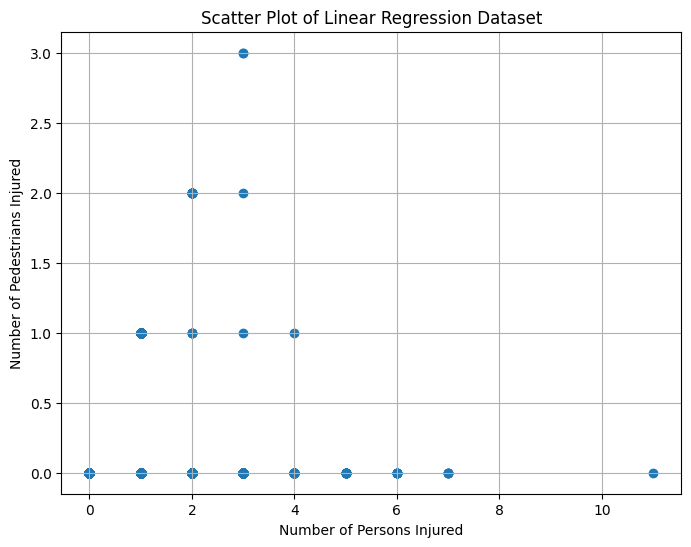

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of the dataset
plt.figure(figsize=(8, 6))
plt.scatter(lr_data['NUMBER OF PERSONS INJURED'], lr_data['NUMBER OF PEDESTRIANS INJURED'])
plt.xlabel('Number of Persons Injured')
plt.ylabel('Number of Pedestrians Injured')
plt.title('Scatter Plot of Linear Regression Dataset')
plt.grid(True)
plt.show()

In [8]:
#from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()

#y['CONTRIBUTING FACTOR VEHICLE 1'] = label.fit_transform(y['CONTRIBUTING FACTOR VEHICLE 1'])

#df_filtered.drop(columns=['NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED'],inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 56)

In [10]:
X_train.head()

,NUMBER OF PERSONS INJURED
4721,4.0
1489,0.0
4841,1.0
8051,0.0
9643,0.0


In [11]:
y_train.head()

,NUMBER OF PEDESTRIANS INJURED
4721,0
1489,0
4841,0
8051,0
9643,0


In [12]:
if not X_test.index.isin(X_train.index).any():
    print("Training and test datasets are disjoint.")
else:
    print("Training and test datasets are not disjoint.")

Training and test datasets are disjoint.


In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [14]:
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
score = reg.score(X_test,y_test)
score

0.08112372418214431

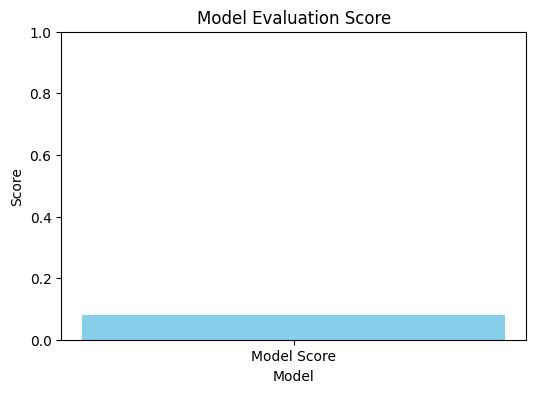

In [16]:
plt.figure(figsize=(6, 4))
plt.bar(['Model Score'], [score], color='skyblue')
plt.ylim(0, 1)  # Assuming the score ranges from 0 to 1
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Evaluation Score')
plt.show()